# Predict max price
This notebook explains how EDA, missingvalues and hyperparameter tuning for random forest and gradient boosting is done for predicting max price.
## Load data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error
df =pd.read_csv('train.csv')


df

,id,name,brand,base_name,screen_size,pixels_x,pixels_y,screen_surface,touchscreen,cpu,...,discrete_gpu,gpu,os,os_details,ram,ssd,storage,weight,min_price,max_price
0,7774,Lenovo Flex 3 15.6-Inch Touchscreen Laptop (Co...,Lenovo,Lenovo Flex 3 80JM002CUS,15.6,1920,1080,Glossy,1,Intel Core i7,...,0,Intel HD,Windows,Windows 10,8,0,1000,4.60,899.00,899.00
1,25926,Razer Blade 15 Gaming Laptop: Intel Core i7-87...,Razer,Razer Blade 15,15.6,1920,1080,Matte,0,Intel Core i7,...,1,NVIDIA GeForce RTX 2070 Max-Q,Windows,Windows 10 Home,16,512,512,4.63,2099.99,2099.99
2,25267,Hp 15.6 Inch HD Thin and Light Laptop ( 7th Ge...,HP,HP,15.6,1366,768,NaN,0,AMD A6,...,0,AMD Radeon R4,Windows,Windows 10,8,0,500,4.63,439.00,449.00
3,22367,"Acer Aspire E 15, 15.6"" Full HD, 8th Gen Intel...",Acer,Acer Aspire E5-576,15.6,1920,1080,Matte,0,Intel Core i3,...,0,Intel UHD 620,Windows,Windows 10 Home,6,0,1000,5.30,375.00,449.00
4,17471,"HP 17.3 inch (1600 x 900) HD+ Laptop PC, Intel...",HP,HP 17,17.3,1600,900,Glossy,0,Intel Core i5,...,0,Intel HD 620,Windows,Windows 10,8,0,1000,5.80,559.00,559.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,3897,Dell Inspiron i3542-5000BK 15.6-Inch Multi-Tou...,Dell,Dell Inspiron i3542-5000BK,15.6,1366,768,Glossy,1,Intel Core i3,...,0,Intel HD 4400,Windows,Windows 8.1,4,0,500,6.00,383.51,383.51
506,19301,"ASUS ROG Strix GL702VS 17.3"" Full HD Ultra Thi...",Asus,Asus ROG GL702VS,17.3,1920,1080,Matte,0,Intel Core i7,...,1,NVIDIA GeForce GTX 1070,Windows,Windows 10 Home,12,128,1128,6.39,1899.99,1899.99
507,22738,ASUS VivoBook Thin and Lightweight FHD WideVie...,Asus,Asus VivoBook F510UA,15.6,1920,1080,Matte,0,Intel Core i5,...,0,Intel UHD 620,Windows,Windows 10 Home,8,128,1128,3.70,499.99,669.97
508,16468,"HP - 17.3"" Laptop - Intel Core i5 - 8GB Memory...",HP,HP 17-x116dx,17.3,1600,900,Glossy,0,Intel Core i5,...,0,Intel HD 620,Windows,Windows 10,8,0,1000,5.84,548.29,548.29


## EDA

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   510 non-null    int64  
 1   name                 510 non-null    object 
 2   brand                510 non-null    object 
 3   base_name            510 non-null    object 
 4   screen_size          510 non-null    float64
 5   pixels_x             510 non-null    int64  
 6   pixels_y             510 non-null    int64  
 7   screen_surface       498 non-null    object 
 8   touchscreen          510 non-null    int64  
 9   cpu                  510 non-null    object 
 10  cpu_details          504 non-null    object 
 11  detachable_keyboard  506 non-null    float64
 12  discrete_gpu         510 non-null    int64  
 13  gpu                  508 non-null    object 
 14  os                   508 non-null    object 
 15  os_details           508 non-null    obj

In [3]:
X=df.drop(columns=['min_price', 'max_price'])
y=df[['min_price','max_price']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [4]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 408 entries, 190 to 448
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   408 non-null    int64  
 1   name                 408 non-null    object 
 2   brand                408 non-null    object 
 3   base_name            408 non-null    object 
 4   screen_size          408 non-null    float64
 5   pixels_x             408 non-null    int64  
 6   pixels_y             408 non-null    int64  
 7   screen_surface       397 non-null    object 
 8   touchscreen          408 non-null    int64  
 9   cpu                  408 non-null    object 
 10  cpu_details          402 non-null    object 
 11  detachable_keyboard  404 non-null    float64
 12  discrete_gpu         408 non-null    int64  
 13  gpu                  407 non-null    object 
 14  os                   406 non-null    object 
 15  os_details           406 non-null    o

In [5]:
X_train.select_dtypes(include=['float64', 'int64'])

,id,screen_size,pixels_x,pixels_y,touchscreen,detachable_keyboard,discrete_gpu,ram,ssd,storage,weight
190,16467,17.3,1920,1080,0,0.0,1,16,0,1000,9.70
411,29199,12.3,2736,1824,1,1.0,0,8,128,128,1.70
266,11940,15.6,1366,768,1,0.0,0,4,0,500,4.70
359,21467,15.6,1366,768,0,0.0,0,12,0,2000,4.30
433,19311,17.3,1600,900,0,0.0,0,4,0,1000,5.62
...,...,...,...,...,...,...,...,...,...,...,...
80,11945,15.6,1366,768,0,0.0,0,6,0,1000,4.85
482,20503,13.3,1920,1080,1,0.0,0,8,256,256,3.72
396,29200,11.6,1366,768,0,0.0,0,4,32,32,2.87
419,29203,15.6,3840,2160,0,0.0,1,16,1000,1000,4.50


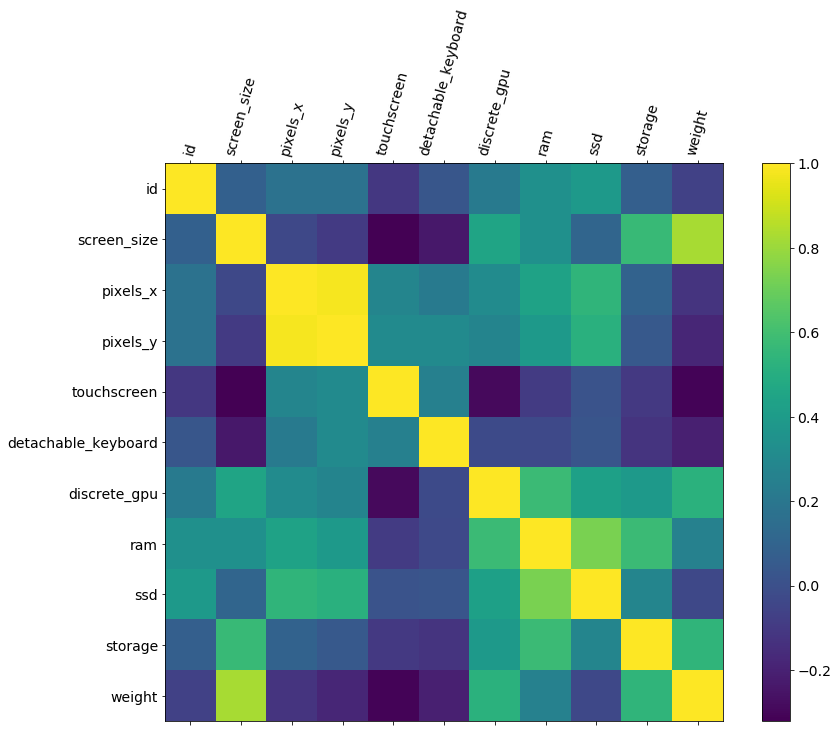

In [6]:
import matplotlib.pyplot as plt



f = plt.figure(figsize=(14, 10))
plt.matshow(X_train.corr(), fignum=f.number)
plt.xticks(range(X_train.select_dtypes(include=['float64', 'int64']).shape[1]), X_train.select_dtypes(include=['float64', 'int64']).columns, fontsize=14, rotation=75)
plt.yticks(range(X_train.select_dtypes(include=['float64', 'int64']).shape[1]), X_train.select_dtypes(include=['float64', 'int64']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
#plt.title('Correlation Matrix', fontsize=16)
plt.show()

Drop variable 'pixels_y', since highly correlated with 'pixels_x' (corr=0.98)

In [7]:
print(X_train['pixels_x'].corr(X_train['pixels_y']))

X_train=X_train.drop(columns=['pixels_y'])
X_train

0.9832502580446099


,id,name,brand,base_name,screen_size,pixels_x,screen_surface,touchscreen,cpu,cpu_details,detachable_keyboard,discrete_gpu,gpu,os,os_details,ram,ssd,storage,weight
190,16467,"Alienware AW17R4-7345SLV-PUS 17"" Laptop (7th G...",Alienware,Alienware 17 (AW17R4-7345SLV-PUS),17.3,1920,Matte,0,Intel Core i7,Intel Core i7-7700HQ 2.8 GHz (7th gen Kaby Lak...,0.0,1,NVIDIA GeForce GTX 1070,Windows,Windows 10,16,0,1000,9.70
411,29199,"NEW Microsoft Surface Pro 7 â€“ 12.3"" Touch-Sc...",Microsoft,Microsoft Surface Pro 7,12.3,2736,Glossy,1,Intel Core i5,Intel Core i5-1035G4 1.1 GHz (10th gen Ice Lak...,1.0,0,Intel Iris Plus,Windows,Windows 10 Home,8,128,128,1.70
266,11940,"HP 15-F222WM 15.6"" Touch Screen Laptop (Intel ...",HP,HP 15-f222wm,15.6,1366,Glossy,1,Intel Pentium,Intel Pentium N3540 2.16 GHz (Bay Trail Quad-C...,0.0,0,Intel HD,Windows,Windows 10,4,0,500,4.70
359,21467,2018 HP Flagship High Performance 15.6 inch HD...,HP,HP,15.6,1366,Glossy,0,Intel Core i5,Intel Core i5-8250U 1.6 GHz (8th gen Kaby Lake...,0.0,0,Intel UHD 620,Windows,Windows 10 Home,12,0,2000,4.30
433,19311,"HP 17.3"" HD+ Laptop, AMD Dual-Core A9-9420 APU...",HP,HP Pavilion 17z,17.3,1600,Glossy,0,AMD A9,AMD A9-9420 3.0 GHz (7th gen Stoney Ridge Dual...,0.0,0,AMD Radeon R5,Windows,Windows 10 Home,4,0,1000,5.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,11945,2017 Dell Inspiron 15.6?? HD LED Display Lapto...,Dell,Dell Inspiron i3558-0954,15.6,1366,Glossy,0,Intel Core i3,Intel Core i3-5005U 2.0 GHz (5th gen Broadwell...,0.0,0,Intel HD 5500,Windows,Windows 10,6,0,1000,4.85
482,20503,Dell Touchscreen 2-in-1 Inspiron 5000 Backlit ...,Dell,Dell Inspiron 5379,13.3,1920,Glossy,1,Intel Core i7,Intel Core i7-8550U 1.8 GHz (8th gen Kaby Lake...,0.0,0,Intel UHD 620,Windows,Windows 10 Home,8,256,256,3.72
396,29200,"Acer Chromebook 11 N7, Celeron N3060, 11.6"" HD...",Acer,Acer Chromebook 11 N7 C731,11.6,1366,Matte,0,Intel Celeron,Intel Celeron N3060 1.6 GHz (Braswell Dual-Core),0.0,0,Intel HD 400,Chrome OS,Chrome OS,4,32,32,2.87
419,29203,"Dell XPS 15 7590, 15.6"" 4K UHD Touch, 9th Gen ...",Dell,Dell XPS 7590,15.6,3840,Glossy,0,Intel Core i7,Intel Core i7-9750H 2.6 GHz (9th gen Coffee La...,0.0,1,NVIDIA GeForce GTX 1650,Windows,Windows 10 Home,16,1000,1000,4.50


In [8]:
X_train.select_dtypes(exclude=['float64', 'int64']).describe()

,name,brand,base_name,screen_surface,cpu,cpu_details,gpu,os,os_details
count,408,408,408,397,408,402,407,406,406
unique,408,15,323,4,23,126,70,4,20
top,2016 Model Dell Inspiron 15 15.6-Inch Full HD ...,Dell,HP,Glossy,Intel Core i7,Intel Core i7-9750H 2.6 GHz (9th gen Coffee La...,Intel UHD 620,Windows,Windows 10 Home
freq,1,86,7,206,138,32,52,342,202


Drop variabele 'name' since all names are unique.

In [9]:
X_train=X_train.drop(columns=['name'])

Drop 'os_details', 'cpu_details' and 'base_name', since categories in these variables can be binned into larger categories in 'os', 'cpu' and brand' respectivily. Drop also 'gpu'.

In [10]:
X_train=X_train.drop(columns=[ 'os_details'])
X_train=X_train.drop(columns=[ 'cpu_details'])
X_train=X_train.drop(columns=[ 'base_name'])
X_train=X_train.drop(columns=[ 'gpu'])

Intel Core i7     138
Intel Core i5     112
Intel Celeron      57
Intel Core i3      23
AMD Ryzen 5        15
AMD A6             12
Intel Pentium      12
Intel Core m3      10
AMD A12             6
Intel Atom          5
AMD Ryzen 3         3
AMD A8              2
AMD A9              2
MediaTek            2
AMD A10             1
AMD Ryzen 7         1
Rockchip            1
Intel Xeon          1
AMD E2              1
Intel Core i9       1
OP1                 1
AMD FX              1
Samsung Exynos      1
Name: cpu, dtype: int64


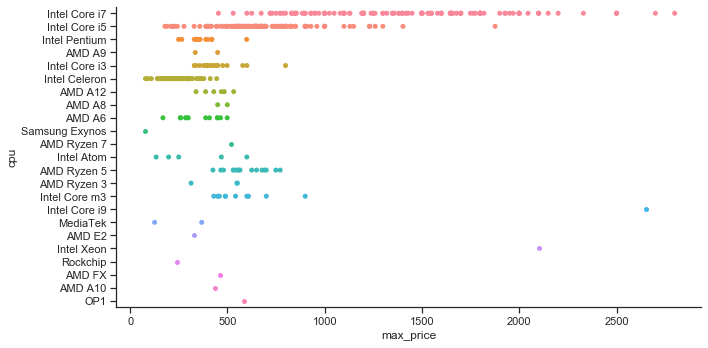

In [11]:
countries = X_train['cpu']

# Get the counts of each category
country_counts = countries.value_counts()

# Print the count values for each category
print(country_counts)

train= pd.concat([X_train, y_train], axis=1, join='inner')
import seaborn as sns

sns.set(style="ticks", color_codes=True)

sns.catplot(x="max_price", y="cpu", jitter=False, data=train,height=5,aspect=2) 

Group all brands with freq less than 9 in category other1.

Group all cpu with freq less than 9 in category other1 (except Intal Core i9 since it has a large price).

In [12]:
countries = X_train['cpu']
country_counts = countries.value_counts()

mask = X_train['cpu'].isin(country_counts[country_counts < 9].index.drop('Intel Core i9'))
# Label all other categories as Other1
X_train['cpu'][mask] = 'Other1'


mask=X_train['cpu'].isin(['Intel Pentium','AMD A6'])
X_train['cpu'][mask] = 'Other1'


<ipython-input-12-9b5dafce0fe1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['cpu'][mask] = 'Other1'
<ipython-input-12-9b5dafce0fe1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['cpu'][mask] = 'Other1'


In [13]:
countries = X_train['brand']
country_counts = countries.value_counts()

mask = X_train['brand'].isin(country_counts[country_counts < 9].index)

# Label all other categories as Other
X_train['brand'][mask] = 'Other1'


<ipython-input-13-57dd871235c7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['brand'][mask] = 'Other1'


Make 'screen surface' and 'os' a dummy variable.

In [14]:
X_train['screen_surface']=X_train['screen_surface'].str.lower()
X_train=pd.get_dummies(X_train, columns=['screen_surface'], drop_first=True, prefix='DM')
X_train=pd.get_dummies(X_train, columns=['os'], drop_first=True, prefix='DM')

X_train=pd.get_dummies(X_train, columns=['brand'], drop_first=True, prefix='DM')
X_train=pd.get_dummies(X_train, columns=['cpu'], drop_first=True, prefix='DM')

In [15]:
train= pd.concat([X_train, y_train], axis=1, join='inner')

In [16]:
train.describe()

,id,screen_size,pixels_x,touchscreen,detachable_keyboard,discrete_gpu,ram,ssd,storage,weight,...,DM_Samsung,DM_Intel Celeron,DM_Intel Core i3,DM_Intel Core i5,DM_Intel Core i7,DM_Intel Core i9,DM_Intel Core m3,DM_Other1,min_price,max_price
count,408.000000,408.000000,408.000000,408.000000,404.000000,408.000000,408.000000,408.000000,408.000000,404.000000,...,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000
mean,21692.232843,14.662745,1862.044118,0.335784,0.032178,0.284314,9.551471,196.779412,579.950980,4.236312,...,0.026961,0.139706,0.056373,0.274510,0.338235,0.002451,0.024510,0.127451,780.795760,818.118676
std,7315.777826,1.605529,570.833442,0.472844,0.176692,0.451641,6.506644,248.322906,525.950117,1.357173,...,0.162168,0.347107,0.230923,0.446815,0.473690,0.049507,0.154815,0.333887,537.284356,567.007850
min,3841.000000,10.100000,1280.000000,0.000000,0.000000,0.000000,2.000000,0.000000,16.000000,1.520000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.000000,76.000000
25%,17750.250000,13.300000,1366.000000,0.000000,0.000000,0.000000,4.000000,0.000000,128.000000,3.082500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,379.742500,394.865000
50%,23157.000000,15.600000,1920.000000,0.000000,0.000000,0.000000,8.000000,128.000000,500.000000,4.410000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,609.995000,642.000000
75%,27882.250000,15.600000,1920.000000,1.000000,0.000000,1.000000,16.000000,256.000000,1000.000000,5.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1099.000000,1159.247500
max,31422.000000,17.300000,3840.000000,1.000000,1.000000,1.000000,64.000000,2000.000000,4000.000000,9.740000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2693.390000,2799.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x12bb9340>,
 'caps': [<matplotlib.lines.Line2D at 0x1143df88>,
 'boxes': [<matplotlib.lines.Line2D at 0x12bb9328>],
 'medians': [<matplotlib.lines.Line2D at 0x12bb9a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x12782400>],
 'means': []}

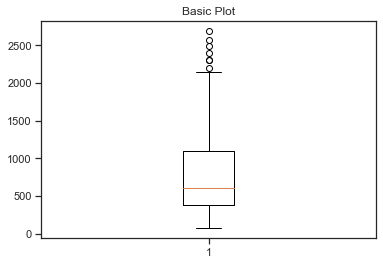

In [17]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(train['min_price'])

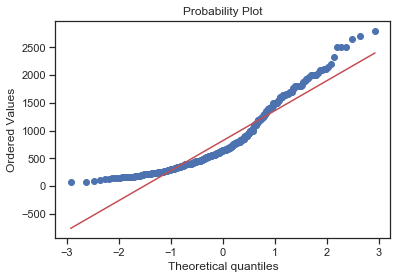

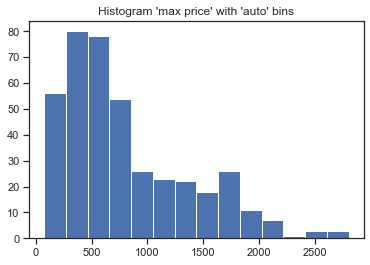

In [18]:
import numpy as np 
import pylab 
import scipy.stats as stats

 
stats.probplot(train['max_price'].to_numpy(), dist="norm", plot=pylab)
pylab.show()

plt.hist(train['max_price'].to_numpy(), bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram 'max price' with 'auto' bins")

plt.show()

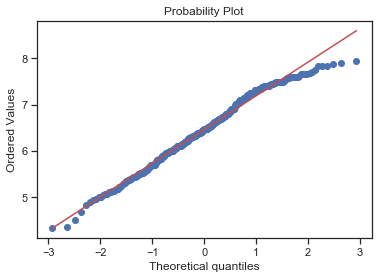

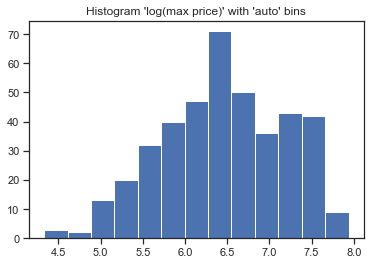

In [19]:
logtransmax=train["max_price"].apply(np.log)
stats.probplot(logtransmax.to_numpy(), dist="norm", plot=pylab)
pylab.show()

plt.hist(logtransmax.to_numpy(), bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram 'log(max price)' with 'auto' bins")

plt.show()

In [20]:
X_train

,id,screen_size,pixels_x,touchscreen,detachable_keyboard,discrete_gpu,ram,ssd,storage,weight,...,DM_Other,DM_Other1,DM_Samsung,DM_Intel Celeron,DM_Intel Core i3,DM_Intel Core i5,DM_Intel Core i7,DM_Intel Core i9,DM_Intel Core m3,DM_Other1
190,16467,17.3,1920,0,0.0,1,16,0,1000,9.70,...,0,0,0,0,0,0,1,0,0,0
411,29199,12.3,2736,1,1.0,0,8,128,128,1.70,...,0,0,0,0,0,1,0,0,0,0
266,11940,15.6,1366,1,0.0,0,4,0,500,4.70,...,0,0,0,0,0,0,0,0,0,1
359,21467,15.6,1366,0,0.0,0,12,0,2000,4.30,...,0,0,0,0,0,1,0,0,0,0
433,19311,17.3,1600,0,0.0,0,4,0,1000,5.62,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,11945,15.6,1366,0,0.0,0,6,0,1000,4.85,...,0,0,0,0,1,0,0,0,0,0
482,20503,13.3,1920,1,0.0,0,8,256,256,3.72,...,0,0,0,0,0,0,1,0,0,0
396,29200,11.6,1366,0,0.0,0,4,32,32,2.87,...,0,0,0,1,0,0,0,0,0,0
419,29203,15.6,3840,0,0.0,1,16,1000,1000,4.50,...,0,0,0,0,0,0,1,0,0,0


## Missing data


In [21]:
nullity = df.isnull()
print(nullity.head())

# Calculate total of missing values
missing_values_sum =nullity.sum()
print('Total Missing Values:\n', missing_values_sum)

# Calculate percentage of missing values
missing_values_percent = nullity.mean() * 100
print('Percentage of Missing Values:\n', missing_values_percent)

      id   name  brand  base_name  screen_size  pixels_x  pixels_y  \
0  False  False  False      False        False     False     False   
1  False  False  False      False        False     False     False   
2  False  False  False      False        False     False     False   
3  False  False  False      False        False     False     False   
4  False  False  False      False        False     False     False   

   screen_surface  touchscreen    cpu  ...  discrete_gpu    gpu     os  \
0           False        False  False  ...         False  False  False   
1           False        False  False  ...         False  False  False   
2            True        False  False  ...         False  False  False   
3           False        False  False  ...         False  False  False   
4           False        False  False  ...         False  False  False   

   os_details    ram    ssd  storage  weight  min_price  max_price  
0       False  False  False    False   False      False      Fals

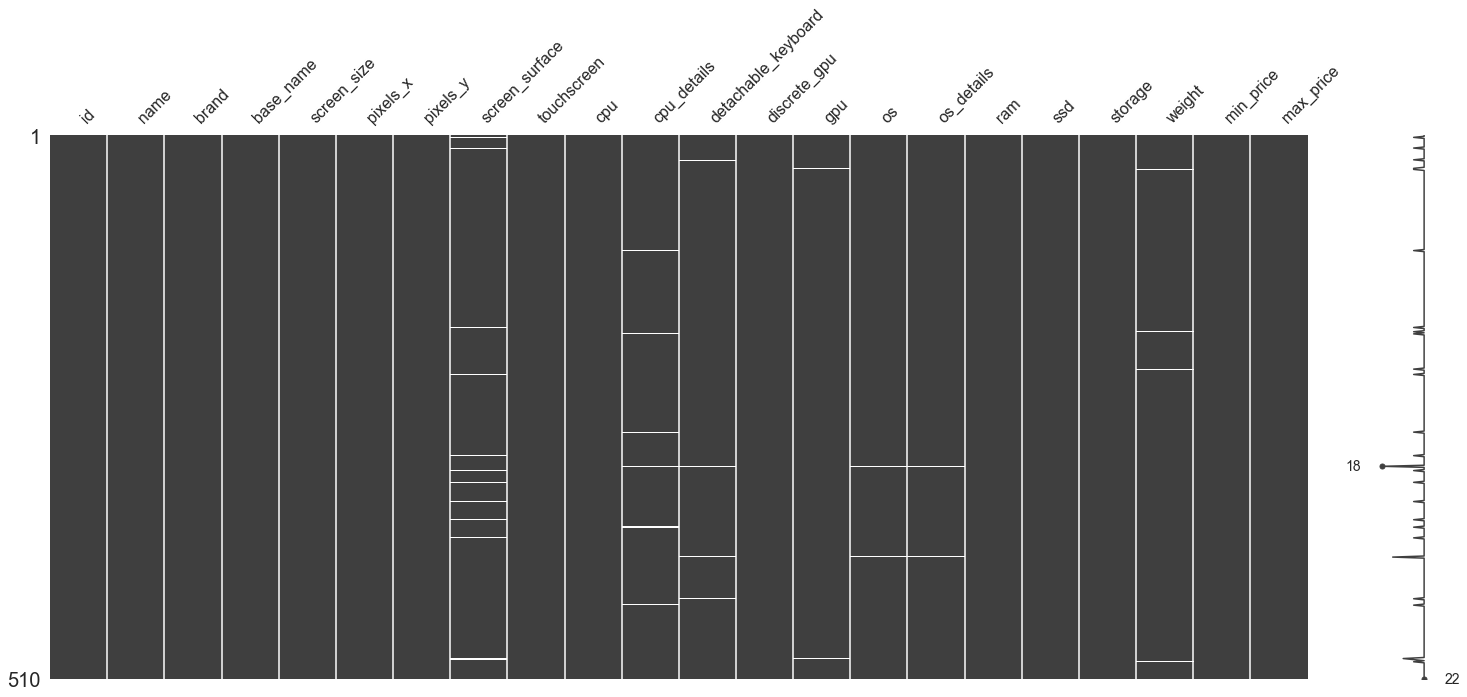

In [22]:
import missingno as msno

# Plot nullity matrix of airquality
msno.matrix(df)

plt.show()


In [23]:
# Drop rows where ''screen_surface', 'weight' and 'detachable_keyboard' has a missing value
df.dropna(subset=['screen_surface'], how='any', inplace=True)
df.dropna(subset=['detachable_keyboard'], how='any', inplace=True)
df.dropna(subset=['weight'], how='any', inplace=True)


In [24]:
df['screen_surface']

0      Glossy
1       Matte
3       Matte
4      Glossy
5      Glossy
        ...  
505    Glossy
506     Matte
507     Matte
508    Glossy
509     Matte
Name: screen_surface, Length: 490, dtype: object

## Feature engineering

Do all the transformation on the dataframe df.

In [69]:
df=df.drop(columns=['pixels_y'])
df=df.drop(columns=['name'])
df=df.drop(columns=[ 'os_details'])
df=df.drop(columns=[ 'cpu_details'])
df=df.drop(columns=[ 'base_name'])
df=df.drop(columns=[ 'gpu'])
df=df.drop(columns=[ 'id'])


countries = df['brand']
country_counts = countries.value_counts()
mask = df['brand'].isin(country_counts[country_counts < 9].index)
# Label all other categories as Other
df['brand'][mask] = 'Other1'

countries = df['cpu']
country_counts = countries.value_counts()
mask = df['cpu'].isin(country_counts[country_counts < 9].index.drop('Intel Core i9'))
# Label all other categories as Other1
df['cpu'][mask] = 'Other1'
mask=df['cpu'].isin(['Intel Pentium','AMD A6'])
df['cpu'][mask] = 'Other1'


df['screen_surface']=df['screen_surface'].str.lower()
df=pd.get_dummies(df, columns=['screen_surface'], drop_first=True, prefix='DM')
df=pd.get_dummies(df, columns=['os'], drop_first=True, prefix='DM')
df=pd.get_dummies(df, columns=['brand'], drop_first=True, prefix='DM')
df=pd.get_dummies(df, columns=['cpu'], drop_first=True, prefix='DM')

KeyError: "['pixels_y'] not found in axis"

In [26]:
X=df.drop(columns=['min_price', 'max_price'])
y=df['max_price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=41)

In [27]:
y_train

33      551.57
45     1649.00
91      553.00
90      849.99
215     771.45
        ...   
84     1099.99
502     338.87
412    1999.11
436    1196.99
465     449.99
Name: max_price, Length: 392, dtype: float64

## Decision tree

In [28]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree = DecisionTreeRegressor()

# Fit the model to the training features and targets
decision_tree.fit(X_train, y_train)

# Check the score on train and test
print(decision_tree.score(X_train, y_train))
print(decision_tree.score(X_test, y_test))

1.0
0.7412138968224402


In [29]:
# Loop through a few different max depths and check the performance
for d in [2,3,4,5,7,10,15]:
    # Create the tree and fit it
    decision_tree = DecisionTreeRegressor(max_depth=d)
    decision_tree.fit(X_train, y_train)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree.score(X_train, y_train))
    print(decision_tree.score(X_test, y_test), '\n')

max_depth= 2
0.6926846470352932
0.6090792830421148 

max_depth= 3
0.7666698498674389
0.7184554709647661 

max_depth= 4
0.8111268949636982
0.7390552062812902 

max_depth= 5
0.8438291874576946
0.7921202718400848 

max_depth= 7
0.9179222517892605
0.7874026357948682 

max_depth= 10
0.9732469397084378
0.7719937142106248 

max_depth= 15
0.9952779419116676
0.7452566700775909 



Max depth of 3 works best.

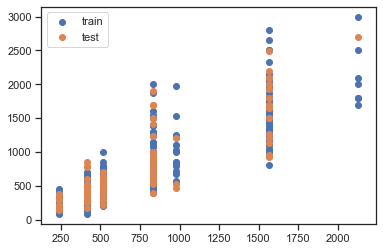

In [30]:
# Use the best max_depth of 3 from last exercise to fit a decision tree
decision_tree = DecisionTreeRegressor(max_depth=3)
decision_tree.fit(X_train, y_train)

# Predict values for train and test
train_predictions = decision_tree.predict(X_train)
test_predictions = decision_tree.predict(X_test)

# Scatter the predictions vs actual values
plt.scatter(train_predictions, y_train, label='train')
plt.scatter(test_predictions, y_test, label='test')
plt.legend()
plt.show()

## Random forest

In [63]:
from sklearn.ensemble import RandomForestRegressor

# Create the random forest model and fit to the training data
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(X_train,y_train)

# Look at the R^2 scores on train and test
print(rfr.score(X_train, y_train))
print(rfr.score(X_test, y_test))


0.9689991869699751
0.8027024568787902


### Hyperparameter tuning using cross validation

In [64]:
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import cross_val_score

# Create a dictionary of hyperparameters to search
grid = {'n_estimators': [200], 'max_depth': [7,9,11], 'max_features': [4,8,12,14], 'random_state': [42]}
test_scores = []

# Loop through the parameter grid, set the hyperparameters, and save the scores
for g in ParameterGrid(grid):
    rfr.set_params(**g)  # ** is "unpacking" the dictionary
    #rfr.fit(X_train, y_train)
    cv_scores = cross_val_score(rfr, X_train, y_train, cv=5,scoring='neg_mean_absolute_error') # change possibly to 'r2'
    test_scores.append(np.mean(cv_scores))

# Find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])

C:\Users\Bram\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Bram\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Bram\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: 

C:\Users\Bram\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Bram\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Bram\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: 

nan {'random_state': 42, 'n_estimators': 200, 'max_features': 12, 'max_depth': 7}


C:\Users\Bram\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"


### Test on test set

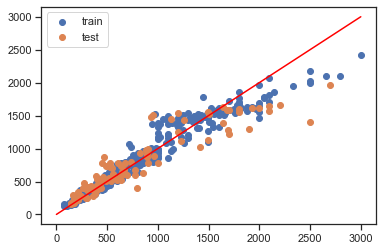

MAE_train is 92.17026318708534
MAE_test is 162.54397952998514


In [50]:
# Use the best hyperparameters from before to fit a random forest model
rfr = RandomForestRegressor(n_estimators=200, max_depth=9, max_features=8, random_state=42)
rfr.fit(X_train, y_train)

# Make predictions with our model
train_predictions = rfr.predict(X_train)
test_predictions = rfr.predict(X_test)

# Create a scatter plot with train and test actual vs predictions
plt.scatter(y_train, train_predictions, label='train')
plt.scatter(y_test, test_predictions, label='test')
plt.plot([1, 2, 3, 3000],[1, 2, 3, 3000], color='red')
plt.legend()
plt.show()

print("MAE_train is {}".format(mean_absolute_error(y_train,  train_predictions)))
print("MAE_test is {}".format(mean_absolute_error(y_test,  test_predictions)))

### Feature importance

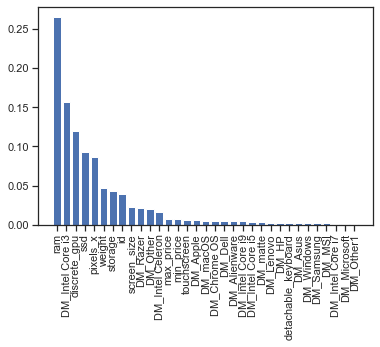

In [54]:
# Get feature importances from our random forest model
importances = rfr.feature_importances_

# Get the index of importances from greatest importance to least
sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))

# Create tick labels 
labels = np.array(df.columns)[sorted_index]
plt.bar(x, importances[sorted_index], tick_label=labels)

# Rotate tick labels to vertical
plt.xticks(rotation=90)
plt.show()

#select 'best' 8 features
featuresrfr=labels[0:8]

## Gradient boosting

In [35]:
from sklearn.ensemble import GradientBoostingRegressor

# Create GB model
gbr = GradientBoostingRegressor(max_features=4,
                                learning_rate=0.01,
                                n_estimators=200,
                                subsample=0.6,
                                random_state=42)
gbr.fit(X_train,y_train)

print(gbr.score(X_train, y_train))
print(gbr.score(X_test, y_test))

0.7641124125669214
0.7045897825417858


### Hyperparameter tuning using cross validation

In [36]:
# Create a dictionary of hyperparameters to search
grid = {'n_estimators': [200], 'learning_rate': [0.01,0.05,0.1], 'max_features': [10, 2,6,8], 'subsample':[0.6,0.4,0.2,0.8], 'random_state': [42]}
test_scores = []

# Loop through the parameter grid, set the hyperparameters, and save the scores
for g in ParameterGrid(grid):
    gbr.set_params(**g)  # ** is "unpacking" the dictionary
    #gbr.fit(X_train, y_train)
    cv_scores = cross_val_score(gbr, X_train, y_train, cv=5,scoring='neg_mean_absolute_error') # change possibly to 'r2'
    test_scores.append(np.mean(cv_scores))

# Find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])


-169.89067524299787 {'subsample': 0.4, 'random_state': 42, 'n_estimators': 200, 'max_features': 10, 'learning_rate': 0.05}


### Test on test set

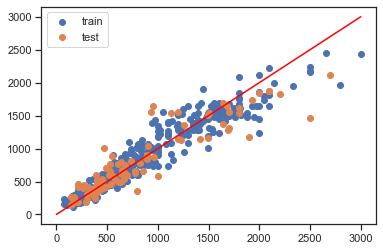

0.9129507938895367
0.8362191766391982
MAE_train is 116.11412894029915
MAE_test is 160.25023927384328


In [52]:
# Create GB model
gbr = GradientBoostingRegressor(max_features=10,
                                learning_rate=0.05,
                                n_estimators=200,
                                subsample=0.4,
                                random_state=42)
gbr.fit(X_train,y_train)


# Make predictions with our model
train_predictions = gbr.predict(X_train)
test_predictions = gbr.predict(X_test)

# Create a scatter plot with train and test actual vs predictions
plt.scatter(y_train, train_predictions, label='train')
plt.scatter(y_test, test_predictions, label='test')
plt.plot([1, 2, 3, 3000],[1, 2, 3, 3000], color='red')
plt.legend()
plt.show()

print(gbr.score(X_train, y_train))
print(gbr.score(X_test, y_test))

print("MAE_train is {}".format(mean_absolute_error(y_train,  train_predictions)))
print("MAE_test is {}".format(mean_absolute_error(y_test,  test_predictions)))

### Feature importance

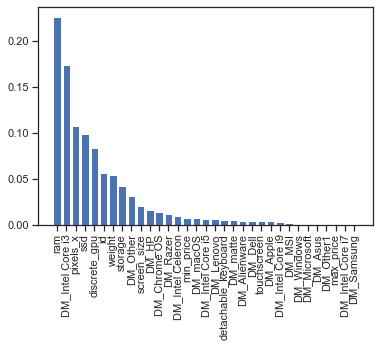

In [55]:
# Extract feature importances from the fitted gradient boosting model
feature_importances = gbr.feature_importances_

# Get the indices of the largest to smallest feature importances
sorted_index = np.argsort(feature_importances)[::-1]
x = range(len(feature_importances))

# Create tick labels 
labels = np.array(df.columns)[sorted_index]

plt.bar(x, feature_importances[sorted_index], tick_label=labels)

# Set the tick lables to be the feature names, according to the sorted feature_idx
plt.xticks(rotation=90)
plt.show()


#select 'best' 8 features
featuresgbr=labels[0:8]

## Cross validation

In [39]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rfr, X, y, cv=5,scoring='neg_mean_absolute_error')

# Print the 5-fold cross-validation scores
print(cv_scores)

# Print the average 5-fold cross-validation score
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[-176.69334137 -192.18277489 -172.74813153 -169.01042072 -189.63467712]
Average 5-Fold CV Score: -180.05386912400655


In [40]:
cv_scores = cross_val_score(gbr, X, y, cv=5,scoring='neg_mean_absolute_error')

# Print the 5-fold cross-validation scores
print(cv_scores)

# Print the average 5-fold cross-validation score
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[-160.37322816 -192.21547172 -161.79570912 -181.0765549  -187.56747424]
Average 5-Fold CV Score: -176.60568762629586


## Feature engineering (bis)

In [57]:
print(featuresgbr)
print(featuresrfr)

['ram' 'DM_Intel Core i3' 'pixels_x' 'ssd' 'discrete_gpu' 'id' 'weight'
 'storage']
['ram' 'DM_Intel Core i3' 'discrete_gpu' 'ssd' 'pixels_x' 'weight'
 'storage' 'id']


Same important features for both random forrest and gradient boost. We can reduce features but this gives as expected not better results. It only makes the model more understandable.

In [61]:
#X=df[featuresgbr]
#y=df['max_price']


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=41)